### KMeans Clustering

**We need to predict the optimum number of
clusters and represent it visually**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
#We load the iris dataset
iris = datasets.load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# We explore the head of the data i.e. first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**We now find the optimum number of clusters for K Means by determining the value of K using the elbow method**

In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


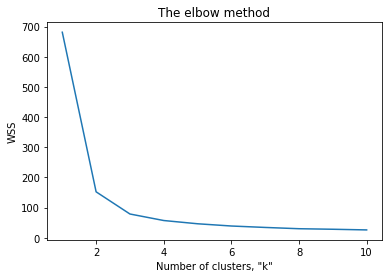

In [13]:
# We now plot the results onto a line graph 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters, "k"')
plt.ylabel('WSS') # Within sum of squares of clusters
plt.show()

We can see that it is an elbow shaped plot that we obtain and thus it is called 'The elbow method'. The optimum clusters is where the elbow occurs. We should choose a number of cluster such that adding another cluster doesn’t improve much better the total WSS.

From this we choose the number of clusters, **k = 3**.

In [14]:
# Now we applying kmeans to the dataset and create the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

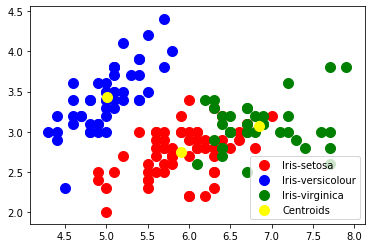

In [15]:
# We try to visualise the clusters - on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# We plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

We observe the yellow dots represent the centroids of the clusters and we have successfully visualized the k-means cluster and obtained the various clusters of species for iris data